### 공부 시간에 따른 시험 점수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
X, y

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2],
        [2.4],
        [2.5],
        [2.6],
        [2.9],
        [3.1],
        [3.2],
        [3.3],
        [3.7],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.4],
        [4.7],
        [4.8]]),
 array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
         52,  58,  54,  68,  80,  84, 100], dtype=int64))

### 단순 선형 회귀

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) 

LinearRegression()

### 데이터 시각화

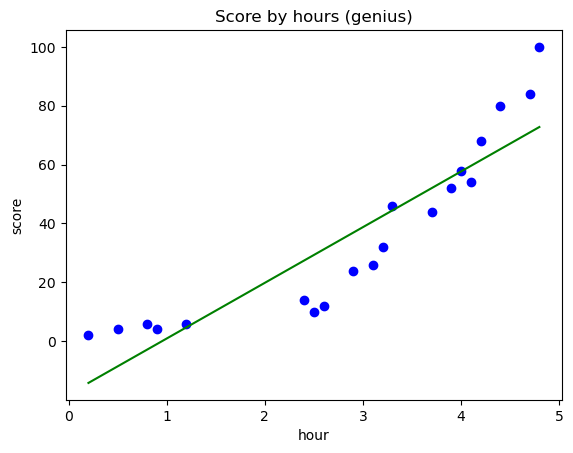

In [8]:
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='green')
plt.title('Score by hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [9]:
reg.score(X, y)

0.8169296513411765

### 다항 회귀(Polynomial Regression)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #4차
poly_X = poly_reg.fit_transform(X)

In [35]:
poly_X[:5]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [36]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(poly_X, y) # 변환된 X와 Y를 가지고 모델 생성

LinearRegression()

### 데이터 시각화(변환된 X와 y)

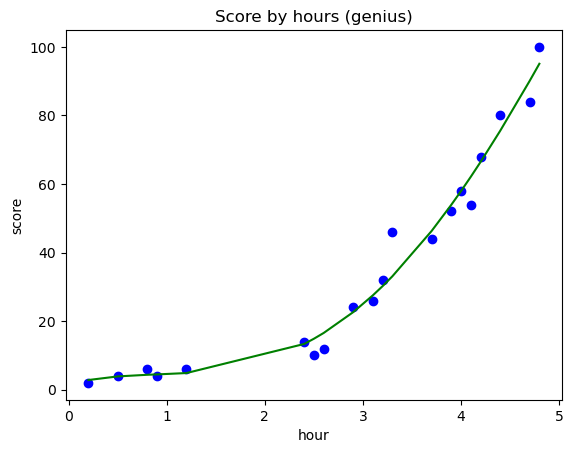

In [38]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('Score by hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [39]:
X_range = np.arange(min(X), max(X), 0.1) #X의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

C:\Users\a\AppData\Local\Temp\ipykernel_13848\2987657062.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) #X의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [40]:
X_range.shape

(46,)

In [41]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개

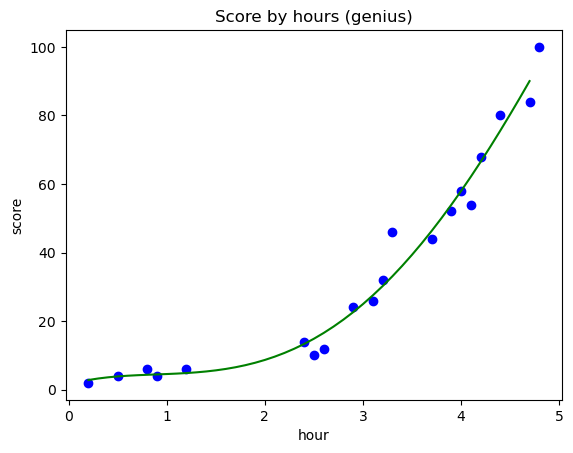

In [42]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시럼 성적 예측

In [46]:
reg.predict([[2]]) #2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [47]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 떄 다항 회귀 모델의 예측

array([8.70559135])

In [49]:
lin_reg.score(poly_X, y)

0.9782775579000045